# <center> Should I Stay or Should I Go? </center>

## <center> A mathematical look into what you should do when you find yourself lost </center>

Josh Greenslade, 24/08/16

----
<img src= "http://i.telegraph.co.uk/multimedia/archive/00783/lost_783801i.jpg" >
---

## Set up
**Picture** the scene: You've just arrived at a new city, and are standing by the best local landmark.
A friend has promised to pick you up, but they're already 15 minutes late and you're starting to wonder where they are. 
You think they might have been sidetracked by one of the many excellent local pubs, so it wouldn't be too difficult for you to wander off and search for your friend.
But if they're looking for you and expecting you to be at this landmark and you go looking for you, they could miss you!

So, the question is:

> In order to minimize your waiting time, should you stay where you are or should you look for your friend?

Of course, such a question could potentially have more interesting applications; getting lost in the desert or stranded somewhere without an easy method of informing others about where you are.

My girlfriend first put me onto this question, and it looked like quite a fun and simple question to answer, both from a mathematical perspective and from a simulation point of view

---

## Maths and Simulating the result

The easiest way we can imagine this is by setting up some sort of grid, like the one below, and randomly placing our two searchers, *Person A* and *Person B* in that grid until they intersect.

<img src= "grid.png?t=" + new Date().getTime(); >


I can envisage 4 different situations that could reasonably occur:

1. *A* searches whilst *B* stays still
2. *B* searches whilst *A* stays still
3. *A* and *B* are both searching
4. *A* and *B* are both staying still.

Situations 1. and 2. are essentially identical, whilst situation 4. is relatively boring as nothing happens and unless they happen to start in the same place, they'll never find each other!

Thus, we have two situations which we find relatively interesting, both looking or one looking and one staying still.

### Both parties searching randomly.

In the grid above, there are 4 different cells we could place our people in.
As the only thing that matters is that they are in the same cell, it doesn't matter where we place the first person; all the matters is the secondn person is also placed in that cell.
The odds of *B* being placed in the same cell as *A* just was are

$$Prob(B\text{ in same cell as } A)_1 = \frac{1}{4},$$

and the odds of *B* not being placed in the same cell as *A* are

$$Prob(B\text{ not in same cell as } A)_1 = \frac{3}{4}.$$

This is all well and good for a single iteration, but we're interested in how long it will take before our lost souls find each other! So what are the odds of them finding each other on the second iteration? Or the third?

Well, in order to find each other on the second attempt, they need to have **NOT** found each other on the first iteration. Thus, the probability of them finding each other on the second iteration is the probability of *B* being placed in the same cell as *A* on iteration 2, multiplied by the probability of *B* not being placed in the same cell as *A* on iteration 1

$$Prob(B\text{ in same cell as } A)_2 = \frac{3}{4} \times \frac{1}{4} = \frac{3}{16},$$

And on the third iteration it's the same situation, but we need to have not found them twice, so we multiply by 3/4 twice:

$$Prob(B\text{ in same cell as } A)_3 = \frac{3}{4} \times \frac{3}{4} \times \frac{1}{4} = \frac{9}{64},$$

and so on and so on.

The probability of the two finding each other on the nth term is then

$$Prob(B\text{ in same cell as } A)_n = (\frac{3}{4})^{n-1} \times \frac{1}{4}.$$

And for an abitrary grid with a total of C cells:

$$Prob(B\text{ in same cell as } A)_n = (\frac{C-1}{C})^{n-1} \times \frac{1}{C}.$$


So, somewhat strangely, you are mostly likely to be found quickly rather than slowly! The longer your friend takes to find you, the more worried you should be that they're not searching for you at all.

We can also simulate this relatively easily, by randomly assigning adding values of 1 to the grid at random positions, and if any position has the value 2, then the two must have found each other. An example of what this looks like in a slightly bigger 5x5 grid is here (code is at the bottom):

<img src= "animation2.gif?t=" + new Date().getTime(); >

If we do this with a 2x2 grid 10,000 times, we can compare the results the fraction of the time the two find each other at step n to our theoretical prediction about the probability. 
<img src= "probtwosearch.png" >

Neat!




--- 

## One searching, one staying still (Random)

With one person searching and one staying still (though the first person is still searching randomly), we have the following situation:

<img src="animation3.gif?t=" + new Date.getTime();>

Which is actually exactly the same as our previous situation! Remember, it doesn't matter where we place the first person, the only thing that matters is if the second person lands in the same square. In a 2x2 grid, this is still $Prob(Same)= \frac{1}{4}$.

## One searching, one staying still (Non-Random)

What if the person who is searching **KNOWS** the other person is staying still? In this case, they can rule out any places they've searched before. On the first iteration, the probability is still the same

$$Prob(B\text{ in same cell as } A)_1 = \frac{1}{4},$$

$$Prob(B\text{not in same cell as } A)_1 = \frac{3}{4},$$

But in the next iteration, the searcher knows that they can't be in the cell they were just in, and they are only left with 3 cells, so a 1 in 3 chance of finding them

$$Prob(B\text{ in same cell as } A)_2 = \frac{1}{3},$$

$$Prob(B\text{not in same cell as } A)_3 = \frac{2}{3},$$

and if they still haven't found them by the third iteration

$$Prob(B\text{ in same cell as } A)_3 = \frac{1}{2},$$

$$Prob(B\text{not in same cell as } A)_3 = \frac{1}{2},$$

<img src="animation4.gif?t=" + new Date.getTime();>

So our equation for calculating the probability of finding someone on iteration n has to change.

$$Prob(\text{ Finding them on turn 2 })_2 = \frac{3}{4} \times \frac{1}{3} = \frac{3}{12} = \frac{1}{4}  ,$$

$$Prob(\text{ Finding them on turn 3 })_3 = \frac{3}{4} \times \frac{2}{3} \times \frac{1}{2} = \frac{1}{4},$$

So the odds of being found on *ANY* iteration are exactly the same as with any other iteration!

<img src="probonesearch.png?t=" + new Date.getTime();>

However, we're more interested in how quickly do you get found?

## How quickly can you find each other?

Instead of plotting the odds that you'll be found on iteration n, what happens if we plot your odds of being found BEFORE iteration n?

If we do that, we end up with the following

<img src="cumpro.png?t=" + new Date.getTime();>

So although the two start off very similar, when one person is searching any they know the other is staying still, you end up finding them a lot quicker on average than if both of you search. In fact, you will eventually find them, whereas if you are both searching, there's no promise that will occur.

In fact, at the point of which you are gaurenteed to find the other person in the one person searching situation, you only have about a 65% chance of finding the other person if you are both searching!

So, remember, if the two of you are meeting up, agree beforehand who is the searcher and who is the stayer!


---

## Conclusion

So this was actually quite a bit of fun :-) It's silly, but it's given me some fun experience with the ipython notebooks, making gifs, and just generally talking about some fun and interesting questions.

There's loads more you could do with this topic. Questions of how long should you wait? What if you don't know if the other person is doing? What occurs when you have multiple people searching? Adding in random walks instead of random placement so the search is more "real". Anyway, this was quite fun to do :-)

The Code is all below if you wish to use it. https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ taught me a lot about animations and how to turn them into gifs! So thanks to him too.




In [170]:
import numpy as np
import pylab as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

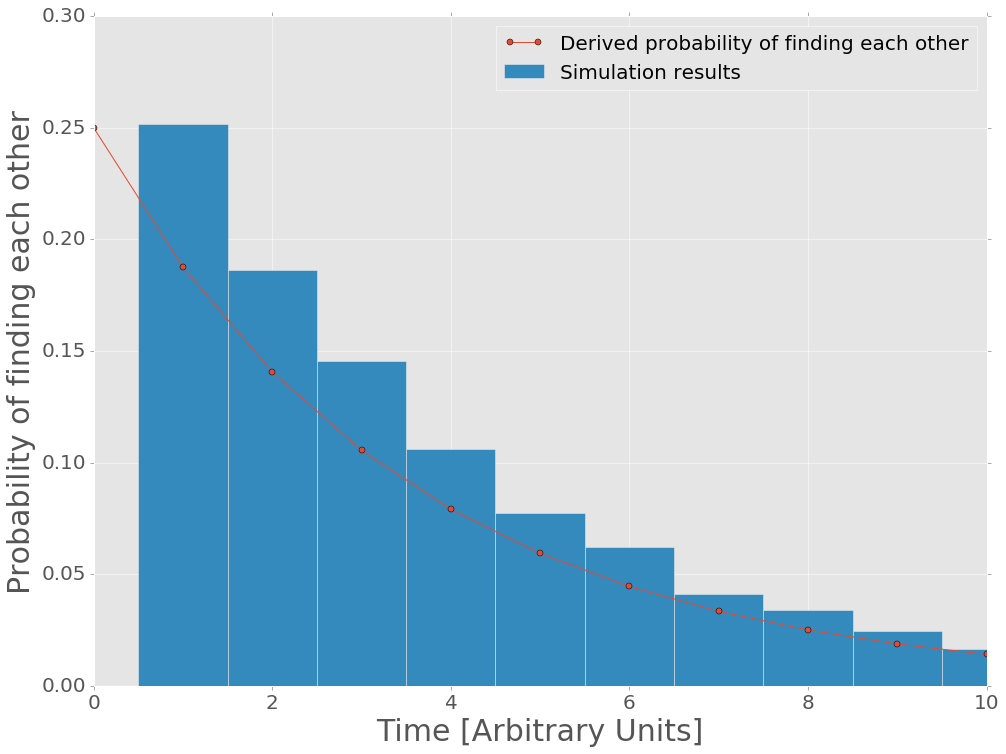

In [168]:
# Code that simulates the odds of two searchers finding each other


# First, we set up some variables to hold the size of our grid, number of iterations, and the grid itself

iterations = 0
n = 2
grid = np.zeros([n,n])


# Then we set up the arrays that will store our time, x positions and y positions
time_array = np.array([])
time_bothsearch = np.array([])
xpos = np.array([-1,-1])
ypos = np.array([-1,-1])


# Finally, we randomly pick positions for our two searchers, and if they both land in the same gridspace
# We finish the run
for i in np.arange(10000):
    while not np.any(grid > 1):
        grid = np.zeros([n,n])
        iterations += 1
        x_pos1, y_pos1 = np.random.randint(n), np.random.randint(n)
        x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
        grid[x_pos1,y_pos1] +=1
        grid[x_pos2,y_pos2] +=1
    
        xpos = np.vstack([xpos,[x_pos1, x_pos2]])
        ypos = np.vstack([ypos,[y_pos1, y_pos2]])
    time_bothsearch = np.append(time_bothsearch, iterations)
    iterations = 0
    grid = np.zeros([n,n])
    


# Finally, plot the result, normalising our iterations histogram to 1.

n = np.arange(100)
n=n
prob_find = (3./4)**(n) * (1./4)
plt.figure(figsize = (16,12))
plt.plot(n,prob_find, 
         marker = 'o', label='Derived probability of finding each other')

plt.hist(time_bothsearch, bins = np.arange(100)-0.5, normed = True, label = 'Simulation results')
plt.legend(fontsize = 20)
plt.xlabel('Time [Arbitrary Units]', fontsize = 30)
plt.ylabel('Probability of finding each other', fontsize = 30)

plt.xticks(fontsize = '20')
plt.yticks(fontsize = '20')
plt.xlim(0,10)

plt.savefig('probtwosearch.png')

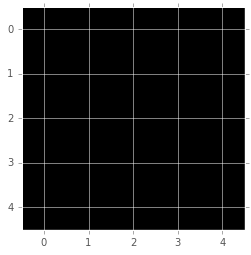

In [37]:
# Code that generates the animation for two searchers


from matplotlib import animation

n = 5
grid = np.zeros([n,n])
x_pos1, y_pos1 = np.random.randint(n), np.random.randint(n)
x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
grid[x_pos1,y_pos1] +=1
grid[x_pos2,y_pos2] +=1


# First set up the figure, the axis, and the plot element we want to animate

fig,ax = plt.subplots()
line = ax.imshow(grid, interpolation='none', cmap='Greys_r', vmin=0, vmax = 2)


# Initialise each frame

def init():
    grid = np.zeros([n,n])
    line.set_data(grid)
    return line

# Animate each frame

def animate(i):
    x_pos1, y_pos1 = np.random.randint(n), np.random.randint(n)
    x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)  
    grid = np.zeros([n,n])

    grid[x_pos1,y_pos1] +=1
    grid[x_pos2,y_pos2] +=1
    line.set_data(grid)
    return line

# Run and save the animation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=15, interval=20)

anim.save('animation2.gif', writer='imagemagick', fps=3) 
# You might need to download and install imagemagick to get this to work!


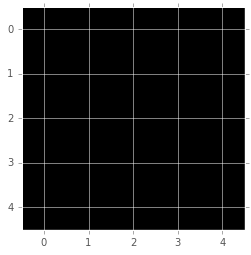

In [41]:
# Code that generates the animation for one searchers


from matplotlib import animation

n = 5
grid = np.zeros([n,n])
x_pos1, y_pos1 = np.random.randint(n), np.random.randint(n)
x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
grid[x_pos1,y_pos1] +=1
grid[x_pos2,y_pos2] +=1


# First set up the figure, the axis, and the plot element we want to animate

fig,ax = plt.subplots()
line = ax.imshow(grid, interpolation='none', cmap='Greys_r', vmin=0, vmax = 2)


# Initialise each frame

def init():
    grid = np.zeros([n,n])
    line.set_data(grid)
    return line

# Animate each frame

def animate(i):
    x_pos1, y_pos1 = np.random.randint(n), np.random.randint(n)
    x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)  
    grid = np.zeros([n,n])

    grid[x_pos1,y_pos1] +=1
    grid[0, 0] +=1
    line.set_data(grid)
    return line

# Run and save the animation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=15, interval=20)

anim.save('animation3.gif', writer='imagemagick', fps=3) 
# You might need to download and install imagemagick to get this to work!


In [ ]:
# Code that generates the grid plot

fig = plt.figure(figsize = (8,5))
plt.axes(xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), aspect='equal')
plt.axhline(0.5, lw = 2, color = 'k')
plt.axhline(1.47, lw = 2, color = 'k')
plt.axhline(-0.49, lw = 2, color = 'k')
plt.axvline(0.5, lw = 2, color = 'k')
plt.axvline(1.47, lw = 2, color = 'k')
plt.axvline(-0.49, lw = 2, color = 'k')
plt.text(0,1, '1', fontsize = 40)
plt.text(1,1, '2', fontsize = 40)
plt.text(0,0, '3', fontsize = 40)
plt.text(1,0, '4', fontsize = 40)
plt.xticks([])
plt.yticks([])
plt.savefig('grid.png', overwrite=True)
print("")

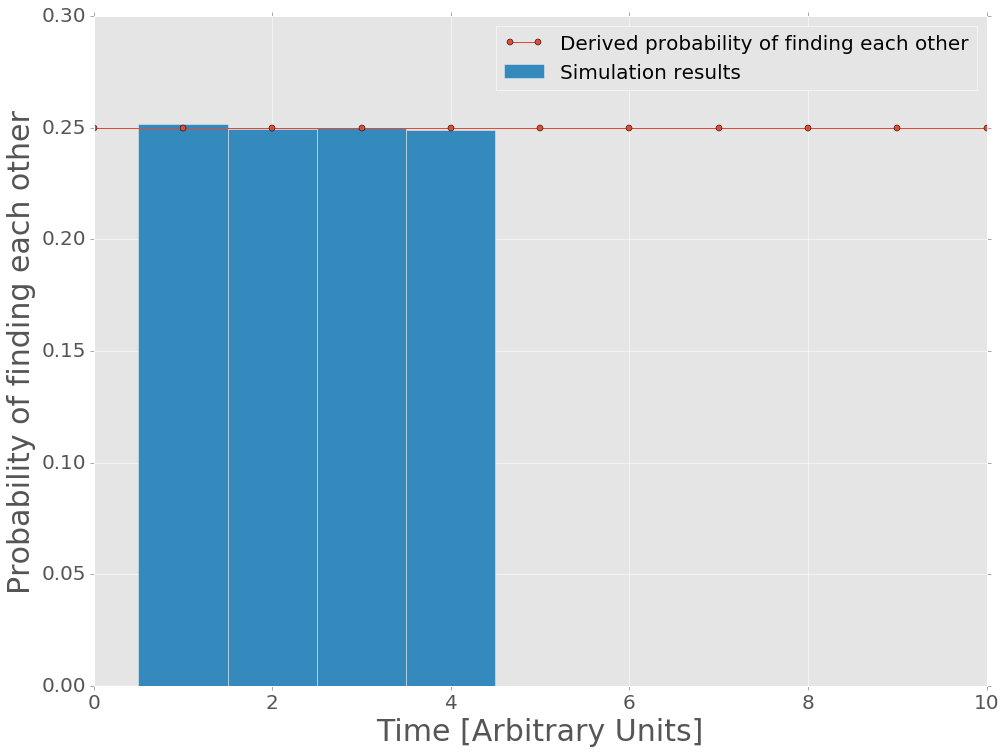

In [167]:
# Code that simulates the odds of one searchers finding the other with knowledge that the other is staying still

# First, we set up some variables to hold the size of our grid, number of iterations, and the grid itself

iterations = 0
n = 2
grid = np.zeros([n,n])
gridarray = np.array(grid)

time_onesearchknow = np.array([])
know = [[n+1,n+1]]

for i in np.arange(10000):
    while not np.any(grid > 1):
        grid = np.zeros([n,n])
        iterations += 1
        x_pos1, y_pos1 = 0, 0
        x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
        while [x_pos2, y_pos2] in know:
            x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
        grid[x_pos1,y_pos1] +=1
        grid[x_pos2,y_pos2] +=1
        know.append([x_pos2, y_pos2])
        gridarray = np.append(gridarray, grid)
    time_onesearchknow = np.append(time_onesearchknow, iterations)
    iterations = 0
    grid = np.zeros([n,n])
    know = [[n+1,n+1]]



# Finally, plot the result, normalising our iterations histogram to 1.

n = np.arange(100)
n=n
prob_find = np.ones(len(n))*1/4
plt.figure(figsize = (16,12))
plt.plot(n,prob_find, 
         marker = 'o', label='Derived probability of finding each other')

plt.hist(time_onesearchknow, bins = np.arange(100)-0.5, normed = True, label = 'Simulation results')
plt.legend(fontsize = 20)
plt.xlabel('Time [Arbitrary Units]', fontsize = 30)
plt.ylabel('Probability of finding each other', fontsize = 30)

plt.xticks(fontsize = '20')
plt.yticks(fontsize = '20')
plt.xlim(0,10)

plt.savefig('probonesearch.png')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


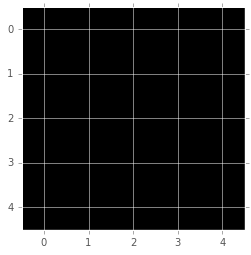

In [149]:

# Code that generates the animation for one searchers


n = 5
grid = np.zeros([n,n]).flatten()
gridarray = grid
iterations = 0
grid = np.zeros([n,n])
know = [[n+1,n+1]]

while not np.any(grid > 3):
    grid = np.zeros([n,n])
    x_pos1, y_pos1 = 0, 0
    x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
    while [x_pos2, y_pos2] in know:
        x_pos2, y_pos2 = np.random.randint(n), np.random.randint(n)
    grid[x_pos1,y_pos1] +=2
    grid[x_pos2,y_pos2] +=2
    for q in know:
        if q == [n+1,n+1]:
            continue
        grid[q[0],q[1]] +=1
    know.append([x_pos2, y_pos2])
    gridarray = np.append(gridarray, grid.flatten())
    



from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate

fig,ax = plt.subplots()
line = ax.imshow(grid, interpolation='none', cmap='Greys_r', vmin=0, vmax = 4)


# Initialise each frame

def init():
    grid = np.zeros([n,n])
    line.set_data(grid)
    return line

# Animate each frame

def animate(i):
    if i >= len(gridarray)/(n*n):
        return line
    gridreturn = gridarray[(n*n)*i:(n*n)*(i+1)].reshape(n,n)

    line.set_data(gridreturn)
    return line

# Run and save the animation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=20)

anim.save('animation4.gif', writer='imagemagick', fps=3) 
# You might need to download and install imagemagick to get this to work!


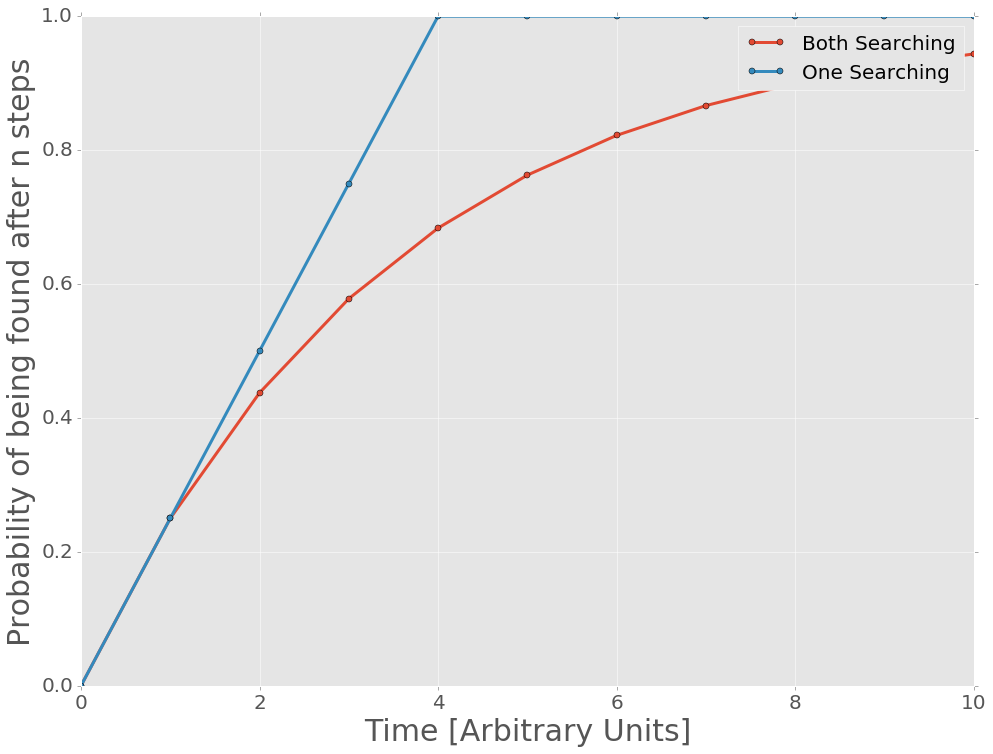

In [169]:
# Code to generate cumulative probability plots

n = np.arange(100)

prob_find_both = (3./4)**(n) * (1./4)
prob_find_one = np.zeros(len(n))
prob_find_one[0:4] = 1/4.
cumprobboth = np.array([np.sum(prob_find_both[:i]) for i in np.arange(len(n))])
cumprobone = np.array([np.sum(prob_find_one[:i]) for i in np.arange(len(n))])


plt.figure(figsize = (16,12))
plt.plot(n,cumprobboth, 
         marker = 'o', label='Both Searching', lw = 3)
plt.plot(n,cumprobone, 
         marker = 'o', label='One Searching', lw = 3)

plt.legend(fontsize = 20)
plt.xlabel('Time [Arbitrary Units]', fontsize = 30)
plt.ylabel('Probability of being found after n steps', fontsize = 30)

plt.xticks(fontsize = '20')
plt.yticks(fontsize = '20')
plt.xlim(0,10)

plt.savefig('cumpro.png')